Дискриминант равен  136.5508
A=  0.2658198068014121  B=  0.5553388833749102
1.0495016787924472   -0.5023569244763781


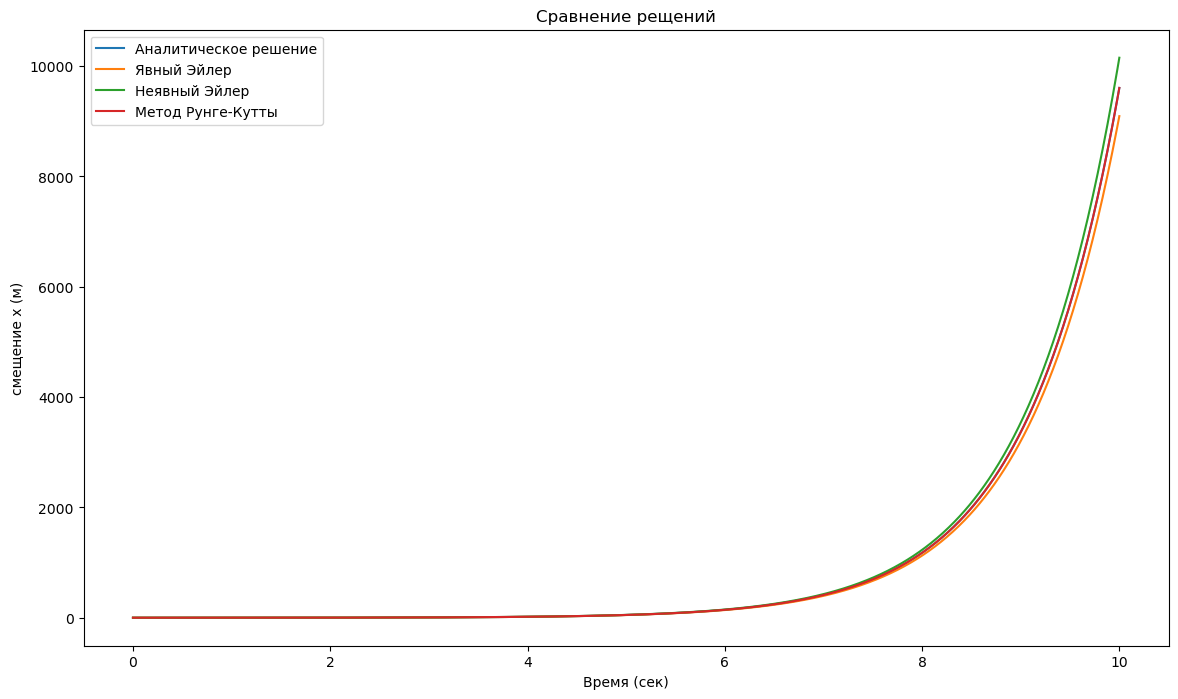

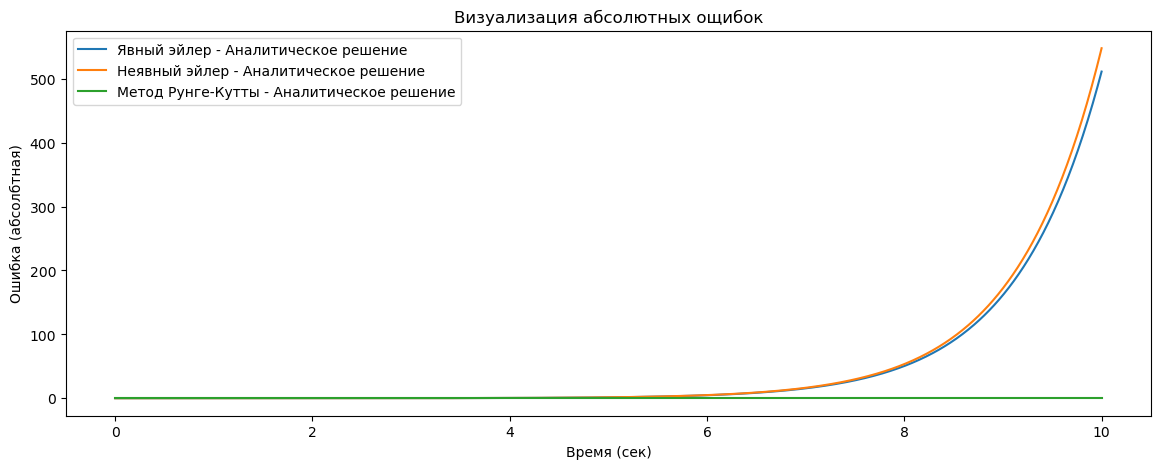

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a, b, c, d = 7.53, -4.12, -3.97, 3.26
x0 = 0.0                         # изначальная позиция x(0)
v0 = 0.0                         # изначальная скорость x˙(0)
Tf = 10.0                        # время симуляции (c)
h = 0.01                         # шаг (c)

def linear_ode_dynamics(state):
    x, v = state[0], state[1]
    xdd = (d - b * v - c * x) / a
    return np.array([v, xdd])


def forward_euler(fun, x0_vec, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0_vec), len(t)))
    x_hist[:, 0] = x0_vec
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    return x_hist, t

def backward_euler(fun, x0_vec, Tf, h, tol=1e-10, max_iter=200):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0_vec), len(t)))
    x_hist[:, 0] = x0_vec
    for k in range(len(t) - 1):
        x_next = x_hist[:, k].copy()
        for _ in range(max_iter):
            rhs = x_hist[:, k] + h * fun(x_next)
            err = np.linalg.norm(rhs - x_next)
            x_next = rhs
            if err < tol:
                break
        x_hist[:, k + 1] = x_next
    return x_hist, t

def runge_kutta4(fun, x0_vec, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0_vec), len(t)))
    x_hist[:, 0] = x0_vec
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x_hist, t

def analytic_solution(t):
    xp = d / c # частное решение взятьое из trial table (не знаю как называется по русски, но у для d равного константе решение тоже будет констаннтой)

    #  дискриминант для характеристического уравнения: a r^2 + b r + c = 0
    disc = b**2 - 4*a*c
    print("Дискриминант равен ", disc)

    # Найдем константы исходя из значения дискриминанта
    if disc > 0:
        r1 = (-b + np.sqrt(disc)) / (2*a)
        r2 = (-b - np.sqrt(disc)) / (2*a)
        A = (v0 - (x0 - xp)*r2) / (r1 - r2)
        B = (x0 - xp) - A
        x = xp + A*np.exp(r1*t) + B*np.exp(r2*t)
        v = A*r1*np.exp(r1*t) + B*r2*np.exp(r2*t)
        print("A= ", A, " B= ", B)
        print(r1, " ", r2)
   
    return x, v


x0_vec = np.array([x0, v0])

# Запуск работы численных методов
xfe, t = forward_euler(linear_ode_dynamics, x0_vec, Tf, h)
xbe, _ = backward_euler(linear_ode_dynamics, x0_vec, Tf, h)
xrk, _ = runge_kutta4(linear_ode_dynamics, x0_vec, Tf, h)

# Запкск аналитического рещения
xa, va = analytic_solution(t)

# расчет отклонений численных методов от аналитического решения
fe_err = np.linalg.norm(xfe[0] - xa, ord=np.inf)
be_err = np.linalg.norm(xbe[0] - xa, ord=np.inf)
rk_err = np.linalg.norm(xrk[0] - xa, ord=np.inf)


plt.figure(figsize=(14, 8))
plt.plot(t, xa, label="Аналитическое решение")
plt.plot(t, xfe[0], label="Явный Эйлер")
plt.plot(t, xbe[0], label="Неявный Эйлер")
plt.plot(t, xrk[0], label="Метод Рунге-Кутты")
plt.xlabel("Время (сек)")
plt.ylabel("смещение x (м)")
plt.legend()
plt.title("Сравнение рещений")
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(t, np.abs(xfe[0]-xa), label="Явный эйлер - Аналитическое решение")
plt.plot(t, np.abs(xbe[0]-xa), label="Неявный эйлер - Аналитическое решение")
plt.plot(t, np.abs(xrk[0]-xa), label="Метод Рунге-Кутты - Аналитическое решение")
plt.xlabel("Время (сек)")
plt.ylabel("Ошибка (абсолбтная)")
plt.legend()
plt.title("Визуализация абсолютных ощибок")
plt.show()